In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df = pd.read_csv('superheated_vapor_properties.csv')

In [76]:
df1 = df['Pressure'] < 300

In [77]:
df2 = df['Pressure'] >= 300
df3 = df['Pressure'] < 1500

In [78]:
df4 = df['Pressure'] >= 1500

In [79]:
df_1 = df[df1]

In [80]:
df_2 = df[df2]

In [81]:
df_3 = df[df3]

In [82]:
v = df['Property'] == 'V'

In [83]:
df

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11200.0,S,3.4440,5.5476,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2491,6.3515,6.4452,6.5324,6.6147,6.6929,6.7679,6.8401,6.9099,6.9777
540,11400.0,V,1.5040,15.2840,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1040,25.5990,27.0100,28.3590,29.6610,30.9250,32.1600,33.3700,34.5600,35.7330
541,11400.0,U,1450.0000,2527.2000,NaN,NaN,NaN,NaN,NaN,NaN,...,2873.1000,2929.4000,2982.6000,3033.9000,3083.9000,3133.1000,3181.9000,3230.4000,3278.8000,3327.2000
542,11400.0,H,1467.2000,2701.5000,NaN,NaN,NaN,NaN,NaN,NaN,...,3147.9000,3221.2000,3290.5000,3357.2000,3422.1000,3485.7000,3548.5000,3610.8000,3672.8000,3734.6000


In [84]:
df_1 = df_1[v]
df_2 = df_2[v]
df_3 = df_3[v]


C:\Users\Dell\AppData\Local\Temp\ipykernel_6780\854690942.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df_1[v]
C:\Users\Dell\AppData\Local\Temp\ipykernel_6780\854690942.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df_2[v]
C:\Users\Dell\AppData\Local\Temp\ipykernel_6780\854690942.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3 = df_3[v]


In [85]:
x1 = df_1['Liq_Sat']
y1 = df_1['Pressure']

In [86]:
def linear(x,m,c):
    return m*x + c

In [87]:
def loss(yhat , y):
    l = ((np.abs(y-yhat))**2)/2
    return l.mean()  

In [88]:
N1=df_1.shape[0]

no of iterations: 0


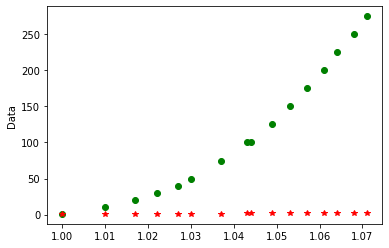

no of iterations: 5000


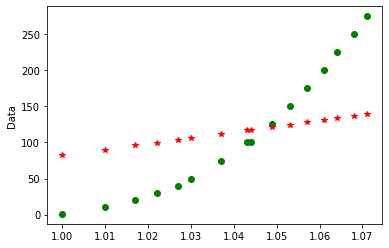

no of iterations: 10000


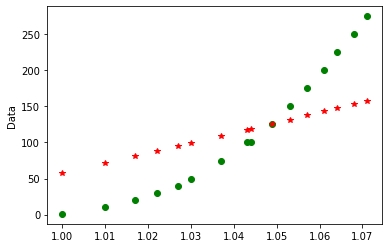

no of iterations: 15000


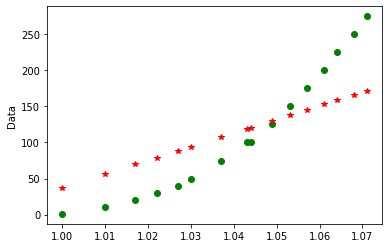

no of iterations: 20000


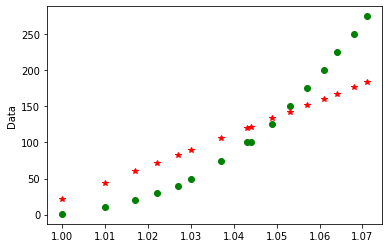

no of iterations: 25000


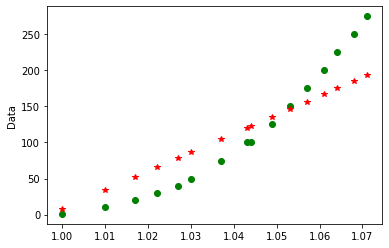

no of iterations: 30000


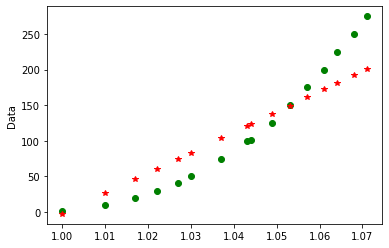

no of iterations: 35000


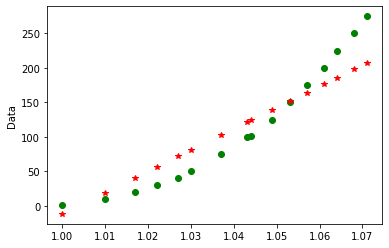

no of iterations: 40000


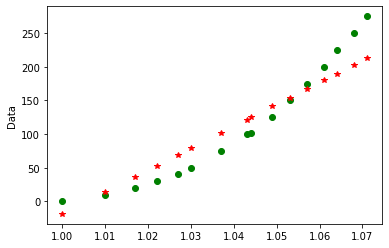

no of iterations: 45000


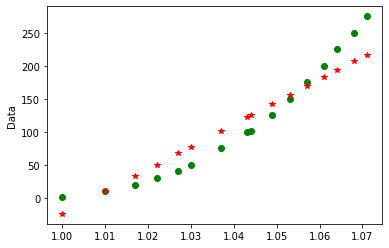

no of iterations: 50000


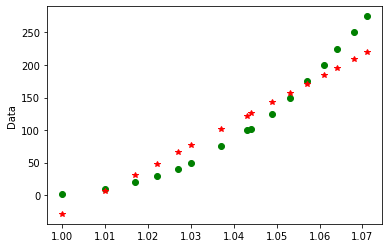

no of iterations: 55000


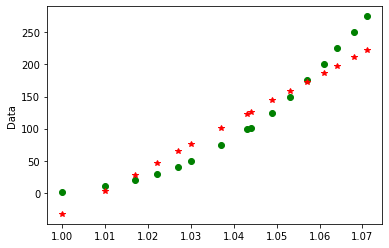

no of iterations: 60000


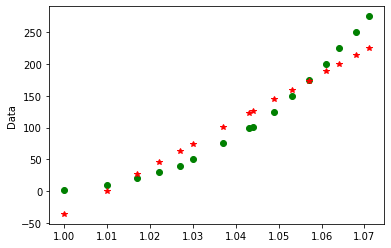

no of iterations: 65000


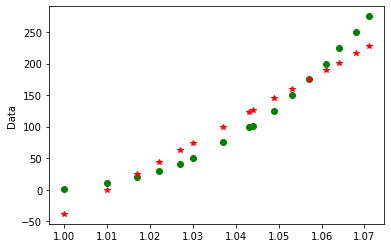

In [111]:
L1=[]
m1 = np.random.randn(1)
c1 = np.random.randn(1)

learningrate = 0.1
numiter = 70000

for i in range(numiter):
    
    y_hat=linear(x1,m1,c1)
   
    dm = (2.0/N1) * -np.sum(np.multiply(x1,(y1 - (m1*x1 +c1))))
   
    dc = (2.0/N1) * -np.sum(y1 - (m1*x1 + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dc
    if i%5000==0:
        L1.append(loss(y_hat,y1))
        l1 = loss
        print ("no of iterations:",i )
        plt.plot(x1,y1,'go')
        plt.plot(x1,y_hat,'r*')
        plt.ylabel('Data')
        plt.show()

In [112]:
y_hat=linear(x1,m1,c1)
differences_line2 = y_hat - y1
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
R21 = line2sum
slope_1 = m1
intercept_1 = c1

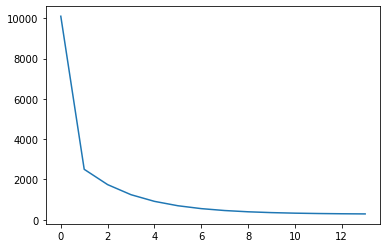

In [113]:
plt.plot(L1)

In [114]:
x2 = df_2['Liq_Sat']
y2 = df_2['Pressure']

In [115]:
N2=df_2.shape[0]

no of iterations: 0


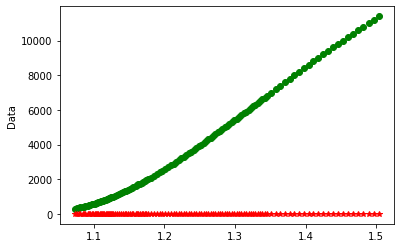

no of iterations: 5000


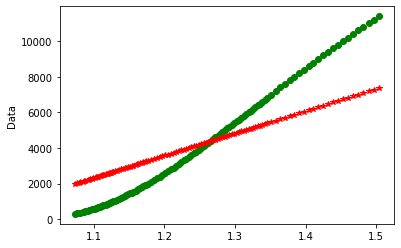

no of iterations: 10000


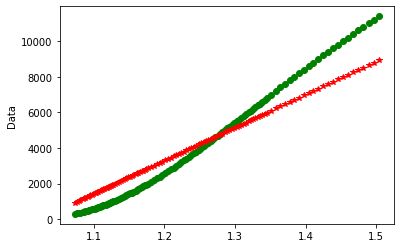

no of iterations: 15000


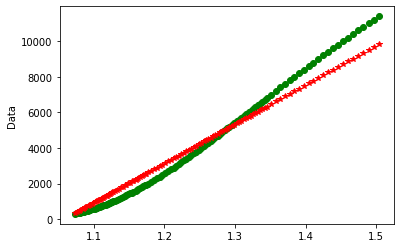

no of iterations: 20000


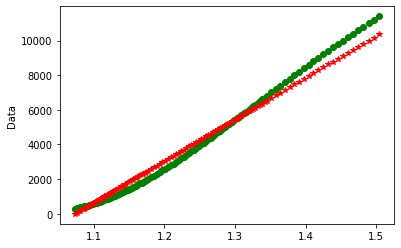

no of iterations: 25000


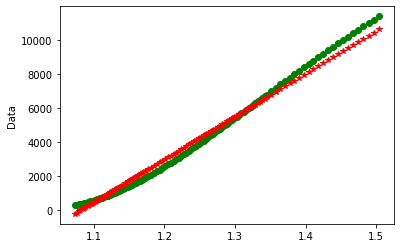

no of iterations: 30000


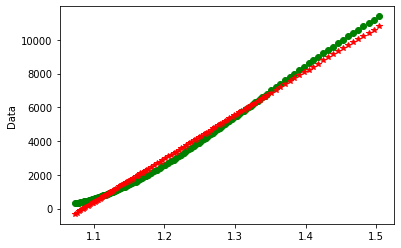

no of iterations: 35000


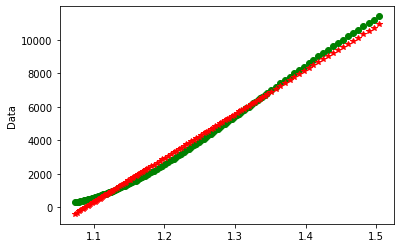

no of iterations: 40000


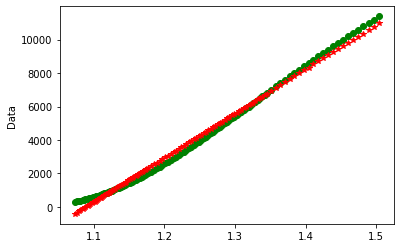

no of iterations: 45000


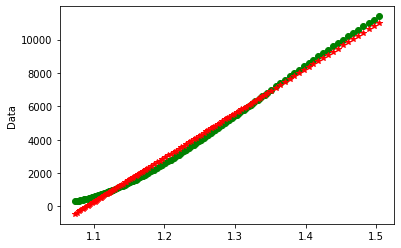

In [116]:
L2=[]
m2 = np.random.randn(1)
c2 = np.random.randn(1)

learningrate = 0.01
numiter = 50000

for i in range(numiter):
    
    y_hat=linear(x2,m2,c2)
   
    dm = (2.0/N2) * -np.sum(np.multiply(x2,(y2 - (m2*x2 +c2))))
   
    dc = (2.0/N2) * -np.sum(y2 - (m2*x2 + c2))
    
    m2 = m2 -learningrate * dm
    c2 = c2 - learningrate * dc
    if i%5000==0:
        L2.append(loss(y_hat,y2))
        l1 = loss
        print ("no of iterations:",i )
        plt.plot(x2,y2,'go')
        plt.plot(x2,y_hat,'r*')
        plt.ylabel('Data')
        plt.show()

In [130]:
y_hat=linear(x2,m2,c2)
differences_line2 = y_hat - y2
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
R22 = line2sum
slope_2 = m1
intercept_2 = c2

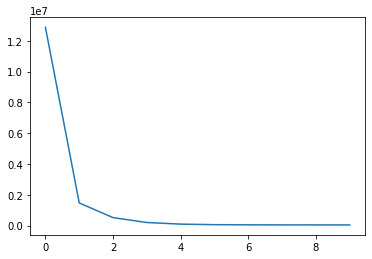

In [117]:
plt.plot(L2)

In [118]:
x3 = df_3['Liq_Sat']
y3 = df_3['Pressure']

In [119]:
N3=df_3.shape[0]

no of iterations: 0


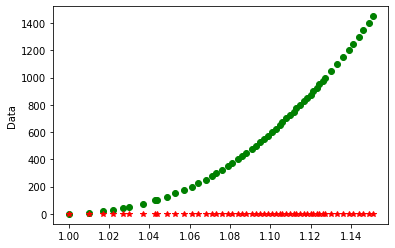

no of iterations: 5000


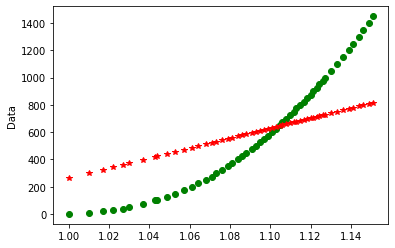

no of iterations: 10000


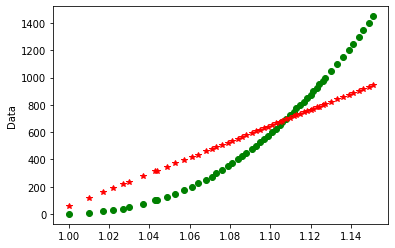

no of iterations: 15000


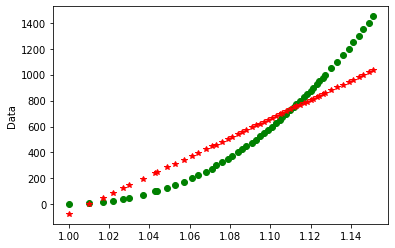

no of iterations: 20000


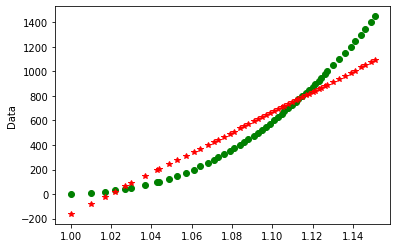

no of iterations: 25000


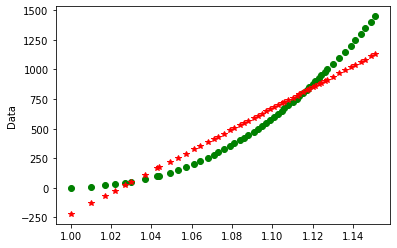

no of iterations: 30000


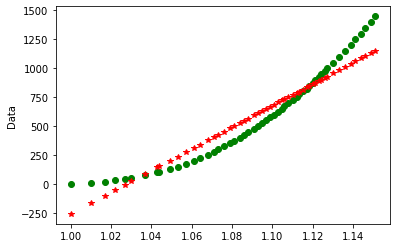

no of iterations: 35000


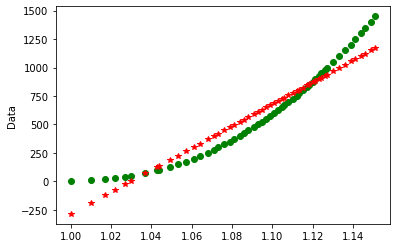

no of iterations: 40000


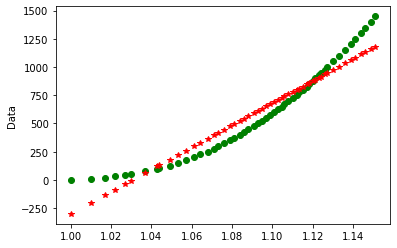

no of iterations: 45000


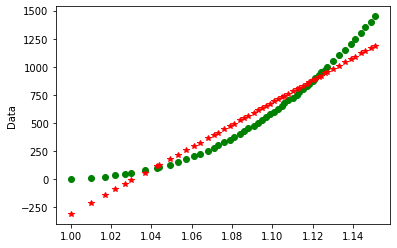

In [128]:
L3=[]
m3 = np.random.randn(1)
c3 = np.random.randn(1)

learningrate = 0.06
numiter = 50000

for i in range(numiter):
    
    y_hat=linear(x3,m3,c3)
   
    dm = (2.0/N3) * -np.sum(np.multiply(x3,(y3 - (m3*x3 +c3))))
   
    dc = (2.0/N3) * -np.sum(y3 - (m3*x3 + c3))
    
    m3 = m3 -learningrate * dm
    c3 = c3 - learningrate * dc
    if i%5000==0:
        L3.append(loss(y_hat,y3))
        l1 = loss
        print ("no of iterations:",i )
        plt.plot(x3,y3,'go')
        plt.plot(x3,y_hat,'r*')
        plt.ylabel('Data')
        plt.show()

In [131]:
y_hat=linear(x3,m3,c3)
differences_line2 = y_hat - y3
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
R23 = line2sum
slope_3 = m3
intercept_3 = c3

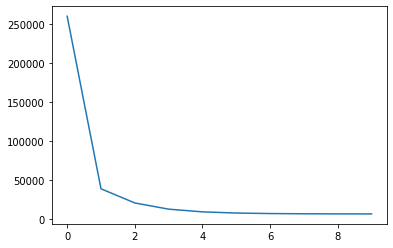

In [129]:
plt.plot(L3)

In [132]:
R21,R22,R23

(9172.30235197354, 9984909.330888594, 724457.2097049562)

In [133]:
m1,m2,m3

(array([3790.23040986]), array([26642.938064]), array([10018.38549189]))

In [134]:
c1,c2,c3

(array([-3830.66509587]), array([-29046.23428993]), array([-10338.50836227]))

In [135]:
from sklearn.linear_model import LinearRegression

In [141]:
x1 = np.array(x1).reshape(-1,1)
y1 = np.array(y1)

In [151]:
model1 = LinearRegression().fit(x1, y1)
r_sq1 = model.score(x1, y1)

In [147]:
x2 = np.array(x2).reshape(-1,1)
y2 = np.array(y2)

In [152]:
model2 = LinearRegression().fit(x2, y2)
r_sq2 = model.score(x2, y2)

In [149]:
x3 = np.array(x3).reshape(-1,1)
y3 = np.array(y3)

In [153]:
model3 = LinearRegression().fit(x2, y2)
r_sq3 = model.score(x3, y3)

In [154]:
r_sq1,r_sq2,r_sq3

(0.9263208134364603, -0.6430778504524735, 0.13400819074872306)

In [158]:
print(model1.intercept_)
print(model1.coef_)

-4052.7653282258007
[4003.57714836]


In [159]:
print(model2.intercept_)
print(model2.coef_)

-29169.31473513391
[26741.75531466]


In [160]:
print(model3.intercept_)
print(model3.coef_)

-29169.31473513391
[26741.75531466]
